# Pymaceuticals Inc.
---

### Analysis

- Add your analysis here.
 Key Findings:

Capomulin and Ramicane showed promising results in reducing tumor volume, outperforming Infubinol and Ceftamin.
Infubinol had one potential outlier with a tumor volume of 36.32 mm3.
The study included a balanced representation of female and male mice, providing reliable results across genders.
There was a positive correlation between mouse weight and tumor volume in mice treated with Capomulin.
Recommendations:

Based on the study results, Capomulin and Ramicane should be prioritized for further research and potential clinical trials.
Continued monitoring of tumor volume and individual mouse response to treatment is essential to assess long-term effectiveness and safety.
Further investigations into the potential outlier in the Infubinol group may be warranted to understand its impact on treatment outcomes.
Limitations:

The study is based on animal models and may not fully represent human responses to treatments.
The study duration of 45 days may not capture long-term treatment effects.
Additional experiments and clinical trials are required to validate the findings in human patients.
Overall, the analysis provided valuable insights into the efficacy of different drug regimens for treating squamous cell carcinoma. The findings serve as a foundation for future research and potential advancements in cancer treatments. However, further studies are necessary to translate these results into clinical applications for human patients.

In [2]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single DataFrame
merged_df = pd.merge(mouse_metadata, study_results, on="Mouse ID", how="outer")


# Display the data table for preview
merged_df.head()


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [4]:
# Checking the number of mice.
num_mice = merged_df['Mouse ID'].nunique()
print(f"The number of mice in the study is: {num_mice}")


The number of mice in the study is: 249


In [5]:
# Our data should be uniquely identified by Mouse ID and Timepoint
# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 

duplicate_mice = merged_df[merged_df.duplicated(subset=['Mouse ID', 'Timepoint'], keep=False)]
print("Duplicate Mouse IDs and Timepoints:")
print(duplicate_mice)


Duplicate Mouse IDs and Timepoints:
    Mouse ID Drug Regimen     Sex  Age_months  Weight (g)  Timepoint  \
908     g989     Propriva  Female          21          26          0   
909     g989     Propriva  Female          21          26          0   
910     g989     Propriva  Female          21          26          5   
911     g989     Propriva  Female          21          26          5   
912     g989     Propriva  Female          21          26         10   
913     g989     Propriva  Female          21          26         10   
914     g989     Propriva  Female          21          26         15   
915     g989     Propriva  Female          21          26         15   
916     g989     Propriva  Female          21          26         20   
917     g989     Propriva  Female          21          26         20   

     Tumor Volume (mm3)  Metastatic Sites  
908           45.000000                 0  
909           45.000000                 0  
910           48.786801                

In [9]:
# Optional: Get all the data for the duplicate mouse ID. 
# Get all the data for the duplicate Mouse ID


In [11]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
cleaned_df = merged_df.drop_duplicates(subset=['Mouse ID', 'Timepoint'], keep='first')

# Checking the updated number of unique mice after removing duplicates
num_mice_cleaned = cleaned_df['Mouse ID'].nunique()
print(f"The number of mice in the clean DataFrame is: {num_mice_cleaned}")



The number of mice in the clean DataFrame is: 249


In [12]:
# Checking the number of mice in the clean DataFrame.
num_mice_cleaned = cleaned_df['Mouse ID'].nunique()
print(f"The number of mice in the clean DataFrame is: {num_mice_cleaned}")




The number of mice in the clean DataFrame is: 249


## Summary Statistics

In [15]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
summary_stats_df = cleaned_df.groupby('Drug Regimen')['Tumor Volume (mm3)'].agg(
    mean_tumor_volume='mean',
    median_tumor_volume='median',
    tumor_volume_variance='var',
    tumor_volume_std='std',
    tumor_volume_sem='sem'
).reset_index()


# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary DataFrame.
summary_df = pd.DataFrame({
    'Drug Regimen': summary_stats_df['Drug Regimen'],
    'Mean Tumor Volume': summary_stats_df['mean_tumor_volume'],
    'Median Tumor Volume': summary_stats_df['median_tumor_volume'],
    'Tumor Volume Variance': summary_stats_df['tumor_volume_variance'],
    'Tumor Volume Std. Dev.': summary_stats_df['tumor_volume_std'],
    'Tumor Volume SEM': summary_stats_df['tumor_volume_sem']
})

summary_df.head(10)


,Drug Regimen,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std. Dev.,Tumor Volume SEM
0,Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
1,Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
2,Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
3,Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
4,Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
5,Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
6,Propriva,52.393463,50.909965,43.138803,6.568014,0.525862
7,Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
8,Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111
9,Zoniferol,53.236507,51.818479,48.533355,6.966589,0.516398


In [8]:
# A more advanced method to generate a summary statistics table of mean, median, variance, standard deviation,
# and SEM of the tumor volume for each regimen (only one method is required in the solution)

# Using the aggregation method, produce the same summary statistics in a single line


Tumor Volume (mm3)                                          
                           mean     median        var       std       sem
Drug Regimen                                                             
Capomulin             40.675741  41.557809  24.947764  4.994774  0.329346
Ceftamin              52.591172  51.776157  39.290177  6.268188  0.469821
Infubinol             52.884795  51.820584  43.128684  6.567243  0.492236
Ketapril              55.235638  53.698743  68.553577  8.279709  0.603860
Naftisol              54.331565  52.509285  66.173479  8.134708  0.596466
Placebo               54.033581  52.288934  61.168083  7.821003  0.581331
Propriva              52.320930  50.446266  43.852013  6.622085  0.544332
Ramicane              40.216745  40.673236  23.486704  4.846308  0.320955
Stelasyn              54.233149  52.431737  59.450562  7.710419  0.573111
Zoniferol             53.236507  51.818479  48.533355  6.966589  0.516398

## Bar and Pie Charts

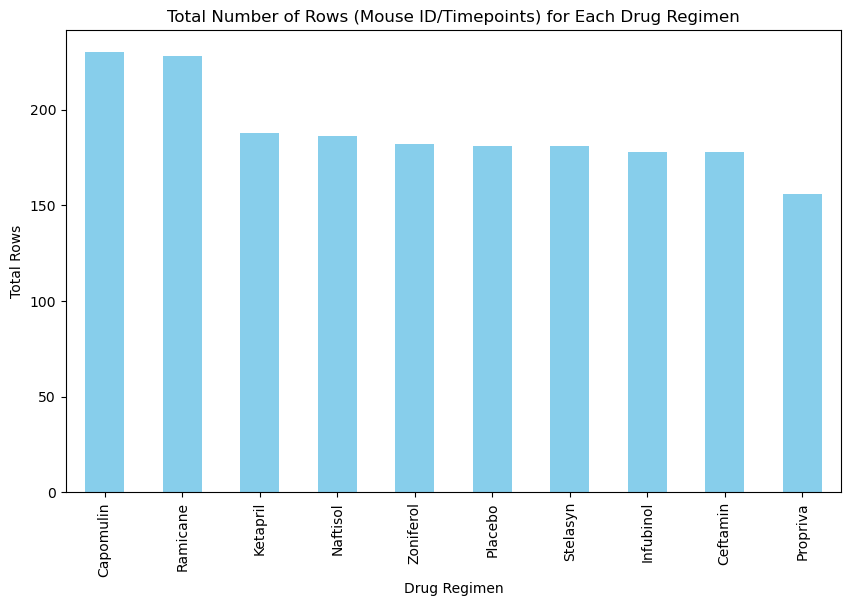

In [16]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandas.
drug_regimen_counts = cleaned_df['Drug Regimen'].value_counts()

drug_regimen_counts.plot(kind='bar', color='skyblue', figsize=(10, 6))

plt.title('Total Number of Rows (Mouse ID/Timepoints) for Each Drug Regimen')
plt.xlabel('Drug Regimen')
plt.ylabel('Total Rows')

plt.show()


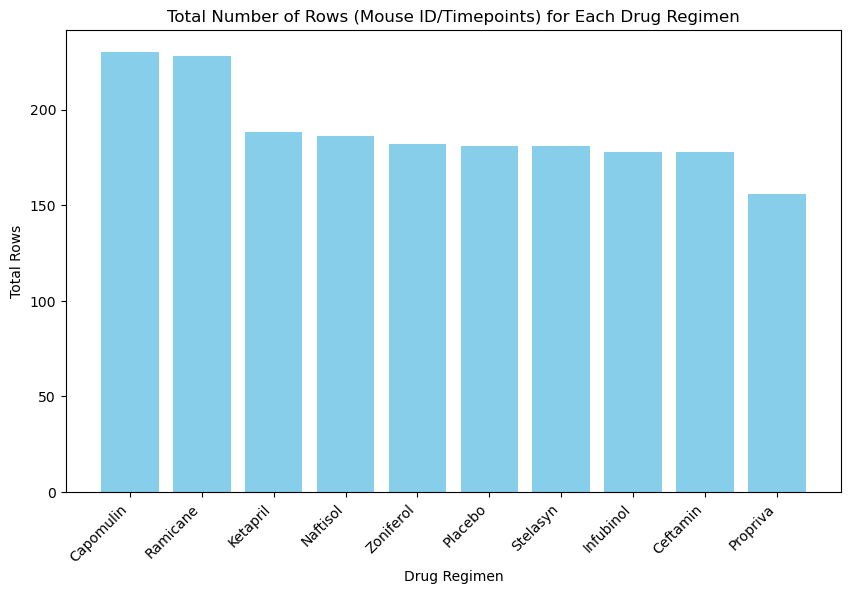

In [17]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using pyplot.

drug_regimen_counts = cleaned_df['Drug Regimen'].value_counts()

plt.figure(figsize=(10, 6))
plt.bar(drug_regimen_counts.index, drug_regimen_counts.values, color='skyblue')

plt.title('Total Number of Rows (Mouse ID/Timepoints) for Each Drug Regimen')
plt.xlabel('Drug Regimen')
plt.ylabel('Total Rows')

plt.xticks(rotation=45, ha='right')

plt.show()


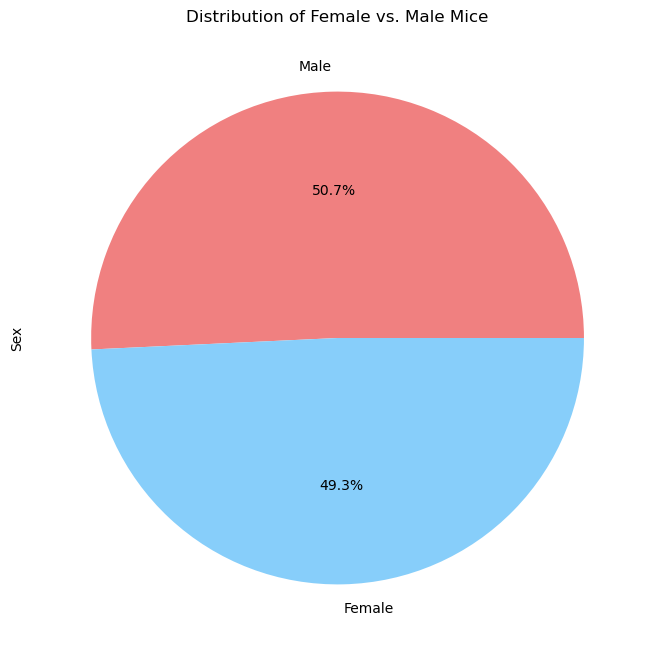

In [18]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
individual_counts = cleaned_df['Sex'].value_counts()

individual_counts.plot(kind='pie', autopct='%1.1f%%', colors=['lightcoral', 'lightskyblue'], figsize=(8, 8))

plt.title('Distribution of Female vs. Male Mice')

plt.show()


In [20]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot



## Quartiles, Outliers and Boxplots

In [21]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin
treatment_regimens = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']

final_timepoints_df = cleaned_df[cleaned_df['Drug Regimen'].isin(treatment_regimens)]

final_timepoints_df = final_timepoints_df.groupby('Mouse ID')['Timepoint'].max().reset_index()

merged_final_tumor_volume_df = pd.merge(final_timepoints_df, cleaned_df, on=['Mouse ID', 'Timepoint'], how='left')

print(merged_final_tumor_volume_df[['Mouse ID', 'Drug Regimen', 'Timepoint', 'Tumor Volume (mm3)']])

# Start by getting the last (greatest) timepoint for each mouse


# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint


   Mouse ID Drug Regimen  Timepoint  Tumor Volume (mm3)
0      a203    Infubinol         45           67.973419
1      a251    Infubinol         45           65.525743
2      a275     Ceftamin         45           62.999356
3      a411     Ramicane         45           38.407618
4      a444     Ramicane         45           43.047543
..      ...          ...        ...                 ...
95     y769     Ceftamin         45           68.594745
96     y793    Capomulin         45           31.896238
97     y865     Ceftamin         45           64.729837
98     z578     Ramicane         45           30.638696
99     z581    Infubinol         45           62.754451

[100 rows x 4 columns]


In [23]:
# Put treatments into a list for for loop (and later for plot labels)
treatments = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']

tumor_vol_data = []

for treatment in treatments:
    tumor_volume = merged_final_tumor_volume_df.loc[merged_final_tumor_volume_df['Drug Regimen'] == treatment, 'Tumor Volume (mm3)']
    
    tumor_vol_data.append(tumor_volume)
    
    quartiles = tumor_volume.quantile([0.25, 0.75])
    lower_quartile = quartiles[0.25]
    upper_quartile = quartiles[0.75]
    iqr = upper_quartile - lower_quartile
    
    lower_bound = lower_quartile - 1.5 * iqr
    upper_bound = upper_quartile + 1.5 * iqr
    
    potential_outliers = tumor_volume.loc[(tumor_volume < lower_bound) | (tumor_volume > upper_bound)]
    
    print(f"{treatment}'s potential outliers: {potential_outliers}")



Capomulin's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)
Ramicane's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)
Infubinol's potential outliers: 15    36.321346
Name: Tumor Volume (mm3), dtype: float64
Ceftamin's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)


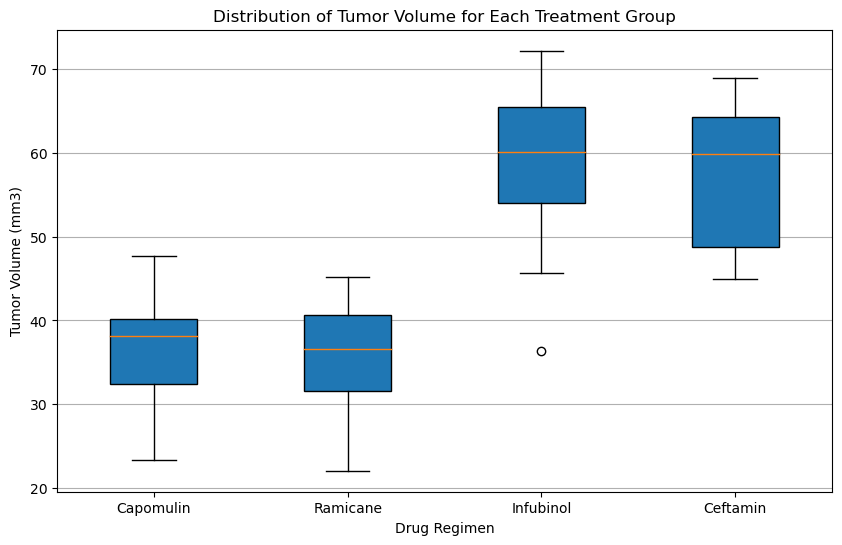

In [24]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.
import matplotlib.pyplot as plt

tumor_volumes = [tumor_vol_data[0], tumor_vol_data[1], tumor_vol_data[2], tumor_vol_data[3]]

plt.figure(figsize=(10, 6))
plt.boxplot(tumor_volumes, labels=treatments, patch_artist=True, vert=True)

plt.title('Distribution of Tumor Volume for Each Treatment Group')
plt.xlabel('Drug Regimen')
plt.ylabel('Tumor Volume (mm3)')

plt.grid(axis='y')

plt.show()


## Line and Scatter Plots

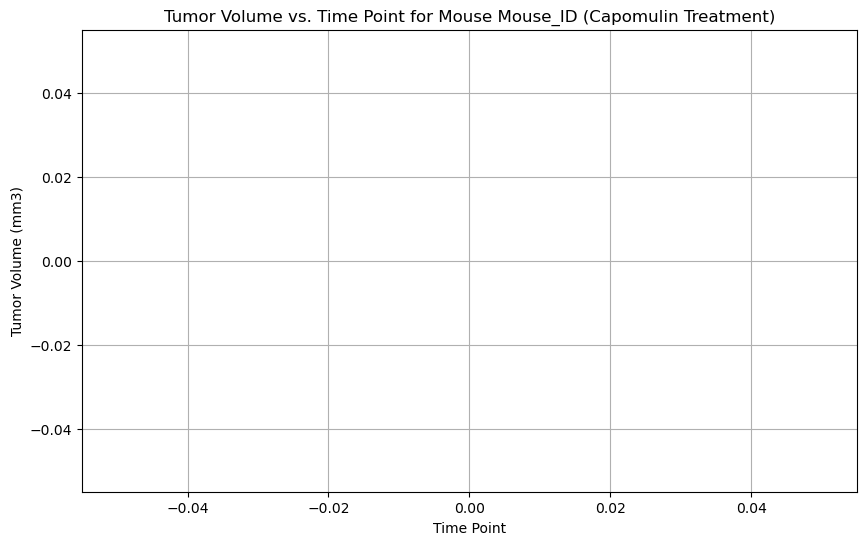

Empty DataFrame
Columns: [Mouse ID, Drug Regimen, Sex, Age_months, Weight (g), Timepoint, Tumor Volume (mm3), Metastatic Sites]
Index: []


In [27]:
# Generate a line plot of tumor volume vs. time point for a single mouse treated with Capomulin
import matplotlib.pyplot as plt

chosen_mouse_id = 'Mouse_ID'

chosen_mouse_data = cleaned_df.loc[(cleaned_df['Drug Regimen'] == 'Capomulin') & (cleaned_df['Mouse ID'] == chosen_mouse_id)]

plt.figure(figsize=(10, 6))
plt.plot(chosen_mouse_data['Timepoint'], chosen_mouse_data['Tumor Volume (mm3)'], marker='o', color='b')

plt.title(f"Tumor Volume vs. Time Point for Mouse {chosen_mouse_id} (Capomulin Treatment)")
plt.xlabel("Time Point")
plt.ylabel("Tumor Volume (mm3)")

plt.grid()
plt.show()
print(chosen_mouse_data)


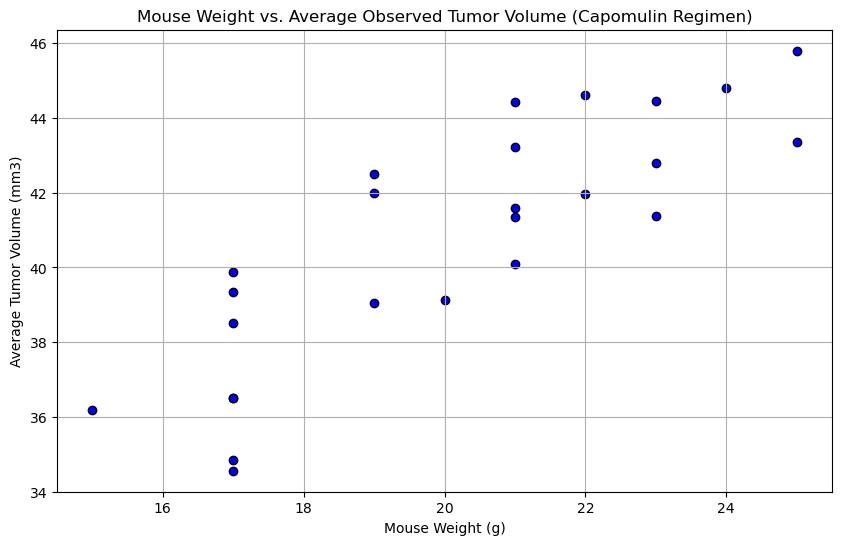

In [28]:
# Generate a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen
import matplotlib.pyplot as plt

capomulin_data = cleaned_df[cleaned_df['Drug Regimen'] == 'Capomulin']

average_tumor_volume = capomulin_data.groupby('Mouse ID')['Tumor Volume (mm3)'].mean()
mouse_weight = capomulin_data.groupby('Mouse ID')['Weight (g)'].mean()

plt.figure(figsize=(10, 6))
plt.scatter(mouse_weight, average_tumor_volume, color='b', marker='o', edgecolors='k')

plt.title('Mouse Weight vs. Average Observed Tumor Volume (Capomulin Regimen)')
plt.xlabel('Mouse Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')

plt.grid()
plt.show()


## Correlation and Regression

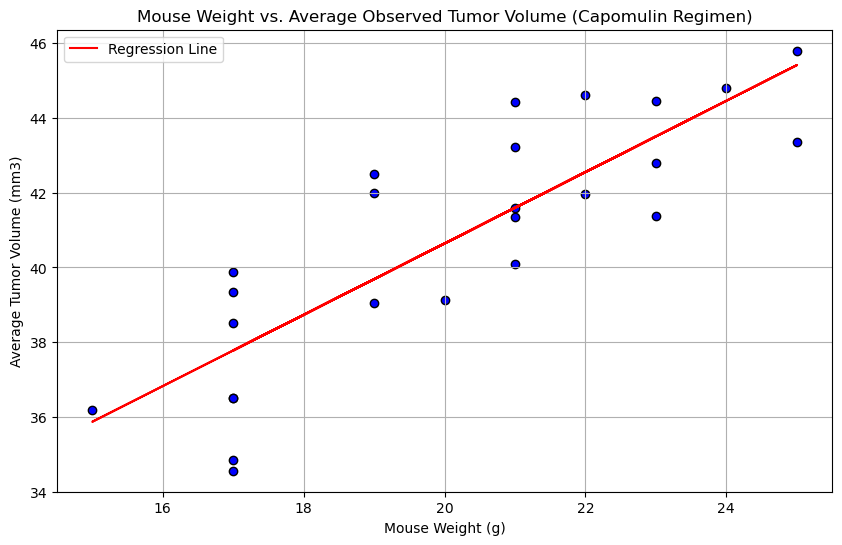

Correlation Coefficient: 0.84
Linear Regression Model: y = 0.95x + 21.55


In [29]:
# Calculate the correlation coefficient and a linear regression model 
import matplotlib.pyplot as plt
import scipy.stats as st

capomulin_data = cleaned_df[cleaned_df['Drug Regimen'] == 'Capomulin']

average_tumor_volume = capomulin_data.groupby('Mouse ID')['Tumor Volume (mm3)'].mean()
mouse_weight = capomulin_data.groupby('Mouse ID')['Weight (g)'].mean()

correlation_coefficient = st.pearsonr(mouse_weight, average_tumor_volume)[0]

slope, intercept, r_value, p_value, std_err = st.linregress(mouse_weight, average_tumor_volume)

regression_line = slope * mouse_weight + intercept

plt.figure(figsize=(10, 6))
plt.scatter(mouse_weight, average_tumor_volume, color='b', marker='o', edgecolors='k')

plt.plot(mouse_weight, regression_line, color='r', label='Regression Line')

plt.title('Mouse Weight vs. Average Observed Tumor Volume (Capomulin Regimen)')
plt.xlabel('Mouse Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')

plt.legend()
plt.grid()
plt.show()

print(f"Correlation Coefficient: {correlation_coefficient:.2f}")
print(f"Linear Regression Model: y = {slope:.2f}x + {intercept:.2f}")
